# Red Wine Quality Analysis - EDA Report

This notebook performs exploratory data analysis (EDA) on the red wine quality dataset to prepare for subsequent machine learning modeling.


## 1. Data Import and Structure Overview


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')


In [14]:
# Load data
df = pd.read_csv('winequality-red.csv', sep=';')

print("=== Basic Data Information ===")
print(f"Data shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n=== Data Type Information ===")
df.info()
print("\n=== First 5 rows ===")
df.head()


=== Basic Data Information ===
Data shape: (1599, 12)
Rows: 1599, Columns: 12

=== Data Type Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

=== First 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. Variable Dictionary


In [15]:
# Create variable dictionary
variable_dict = {
    'variable_name': [
        'fixed acidity',
        'volatile acidity', 
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol',
        'quality'
    ],
    'description': [
        'Fixed acidity',
        'Volatile acidity',
        'Citric acid',
        'Residual sugar',
        'Chlorides',
        'Free sulfur dioxide',
        'Total sulfur dioxide',
        'Density',
        'pH',
        'Sulphates',
        'Alcohol content',
        'Quality score'
    ],
    'unit': [
        'g/dm³',
        'g/dm³',
        'g/dm³',
        'g/dm³',
        'g/dm³',
        'mg/dm³',
        'mg/dm³',
        'g/cm³',
        'dimensionless',
        'g/dm³',
        '% vol',
        '0-10 scale'
    ]
}

data_dict_df = pd.DataFrame(variable_dict)
print("Variable Dictionary:")
print(data_dict_df)

# Save variable dictionary
import os
os.makedirs('tables', exist_ok=True)
data_dict_df.to_csv('tables/data_dict.csv', index=False, encoding='utf-8')
print("\nVariable dictionary saved to tables/data_dict.csv")


Variable Dictionary:
           variable_name           description           unit
0          fixed acidity         Fixed acidity          g/dm³
1       volatile acidity      Volatile acidity          g/dm³
2            citric acid           Citric acid          g/dm³
3         residual sugar        Residual sugar          g/dm³
4              chlorides             Chlorides          g/dm³
5    free sulfur dioxide   Free sulfur dioxide         mg/dm³
6   total sulfur dioxide  Total sulfur dioxide         mg/dm³
7                density               Density          g/cm³
8                     pH                    pH  dimensionless
9              sulphates             Sulphates          g/dm³
10               alcohol       Alcohol content          % vol
11               quality         Quality score     0-10 scale

Variable dictionary saved to tables/data_dict.csv


## 3. Missing Values Check


In [16]:
# Check missing values
missing_values = df.isna().sum()
print("=== Missing Values Statistics ===")
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")
print(f"Missing value percentage: {missing_values.sum() / (df.shape[0] * df.shape[1]) * 100:.2f}%")


=== Missing Values Statistics ===
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Total missing values: 0
Missing value percentage: 0.00%


## 4. Outlier Detection (IQR Method)


In [17]:
# Detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Detect outliers for all numeric variables
numeric_columns = df.select_dtypes(include=[np.number]).columns
outlier_counts = {}

for col in numeric_columns:
    outlier_counts[col] = detect_outliers_iqr(df, col)

outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Variable', 'Outlier Count'])
print("=== Outlier Detection Results (IQR Method) ===")
print(outlier_df)
print(f"\nTotal outliers: {sum(outlier_counts.values())}")


=== Outlier Detection Results (IQR Method) ===
                Variable  Outlier Count
0          fixed acidity             49
1       volatile acidity             19
2            citric acid              1
3         residual sugar            155
4              chlorides            112
5    free sulfur dioxide             30
6   total sulfur dioxide             55
7                density             45
8                     pH             35
9              sulphates             59
10               alcohol             13
11               quality             28

Total outliers: 601


## 5. Target Variable Processing


=== Target Variable Distribution ===
Original quality distribution:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Binary quality distribution:
quality_binary
1    855
0    744
Name: count, dtype: int64

High quality wine (>=6) proportion: 53.47%


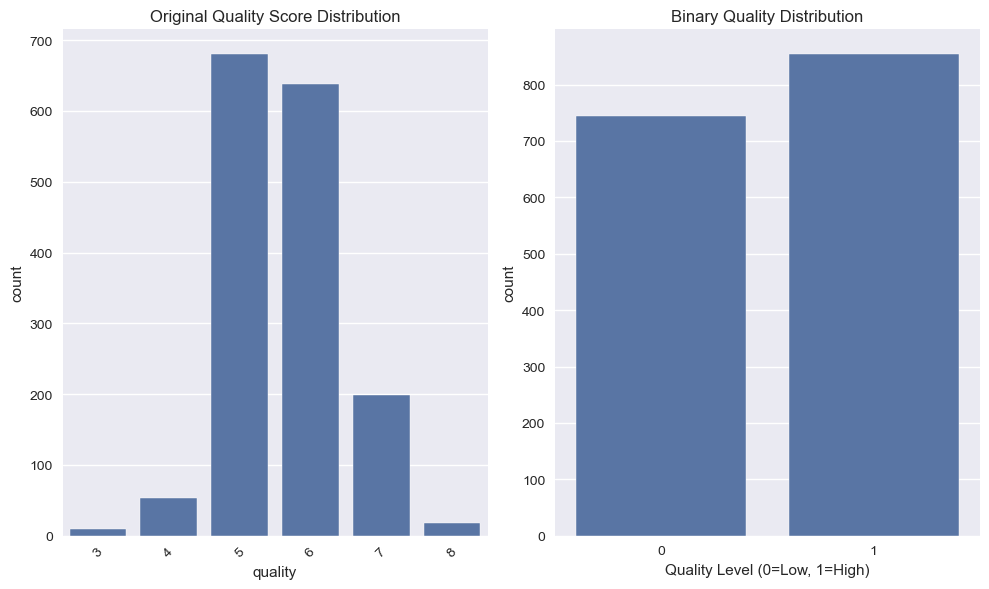

In [18]:
# Convert quality to binary variable
df['quality_binary'] = (df['quality'] >= 6).astype(int)

print("=== Target Variable Distribution ===")
print(f"Original quality distribution:")
print(df['quality'].value_counts().sort_index())
print(f"\nBinary quality distribution:")
print(df['quality_binary'].value_counts())
print(f"\nHigh quality wine (>=6) proportion: {df['quality_binary'].mean():.2%}")

# Plot class balance
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='quality')
plt.title('Original Quality Score Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='quality_binary')
plt.title('Binary Quality Distribution')
plt.xlabel('Quality Level (0=Low, 1=High)')

plt.tight_layout()

# Save plot
os.makedirs('figures', exist_ok=True)
plt.savefig('figures/class_balance.png', dpi=300, bbox_inches='tight')
plt.show()


## 6. Descriptive Statistics


In [19]:
# Descriptive statistics
print("=== Descriptive Statistics ===")
summary_stats = df.describe()
print(summary_stats)

# Save descriptive statistics
summary_stats.to_csv('tables/summary_stats.csv', encoding='utf-8')
print("\nDescriptive statistics saved to tables/summary_stats.csv")


=== Descriptive Statistics ===
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.01200

## 7. Variable Distribution Plots


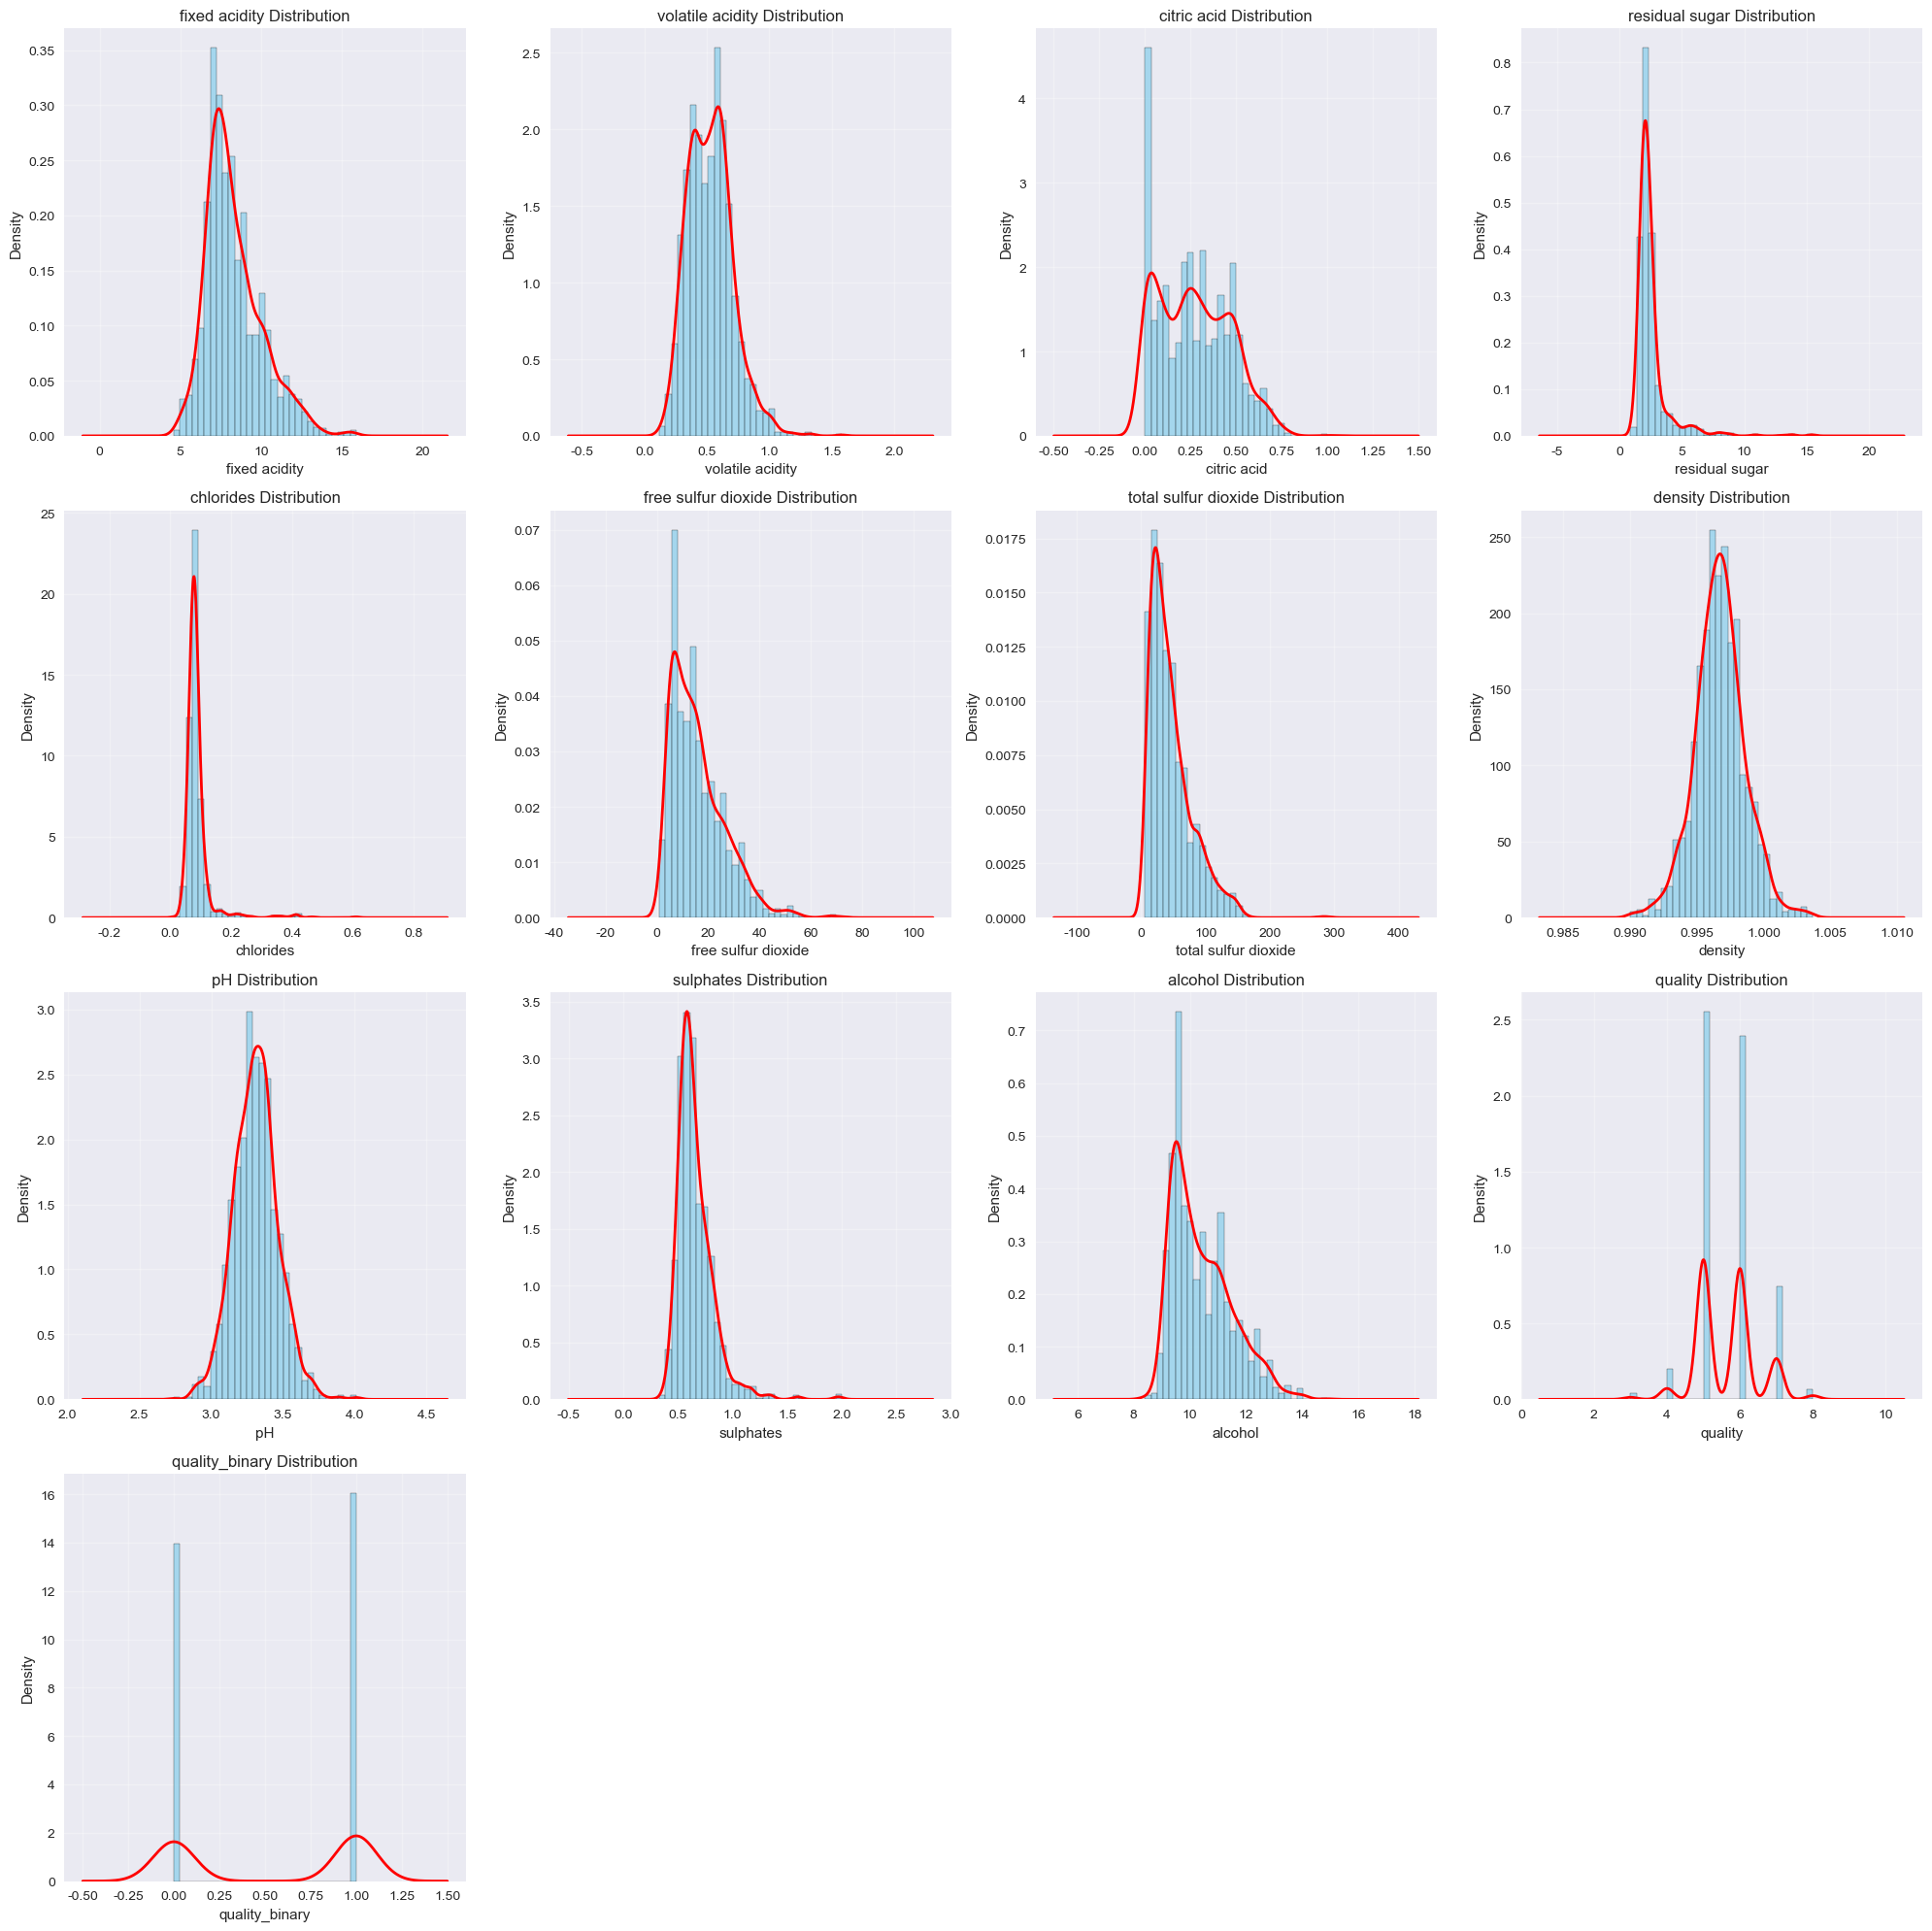

In [20]:
# Plot distribution of all numeric variables
numeric_columns = df.select_dtypes(include=[np.number]).columns
n_cols = 4
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        # Plot histogram and kernel density
        axes[i].hist(df[col], bins=30, alpha=0.7, density=True, color='skyblue', edgecolor='black')
        df[col].plot(kind='kde', ax=axes[i], color='red', linewidth=2)
        axes[i].set_title(f'{col} Distribution', fontsize=12)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Density')
        axes[i].grid(True, alpha=0.3)

# Hide extra subplots
for i in range(len(numeric_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.savefig('figures/hist_grid_v1.png', dpi=300, bbox_inches='tight')
plt.show()


## 8. Correlation Analysis


=== Correlation Matrix ===
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   
quality_binary             0.095093         -0.321441     0.159

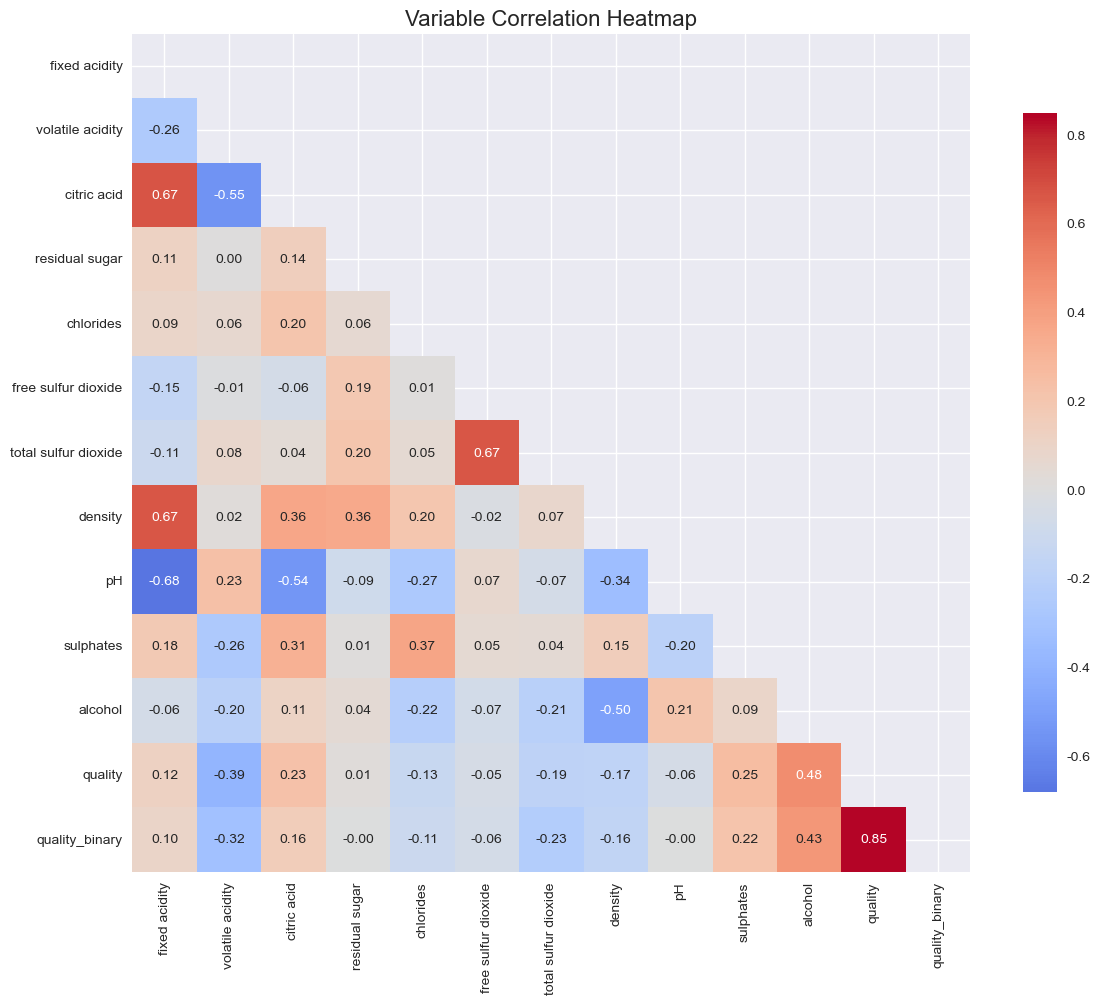


=== Variables with Highest Correlation to Quality ===
quality_binary          0.848279
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64


In [21]:
# Calculate correlation matrix
correlation_matrix = df.corr()

print("=== Correlation Matrix ===")
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Variable Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.savefig('figures/corr_heatmap_v1.png', dpi=300, bbox_inches='tight')
plt.show()

# Show variables with highest correlation to quality
quality_corr = correlation_matrix['quality'].abs().sort_values(ascending=False)
print("\n=== Variables with Highest Correlation to Quality ===")
print(quality_corr[1:])  # Exclude quality itself


## 9. Key Feature Relationships


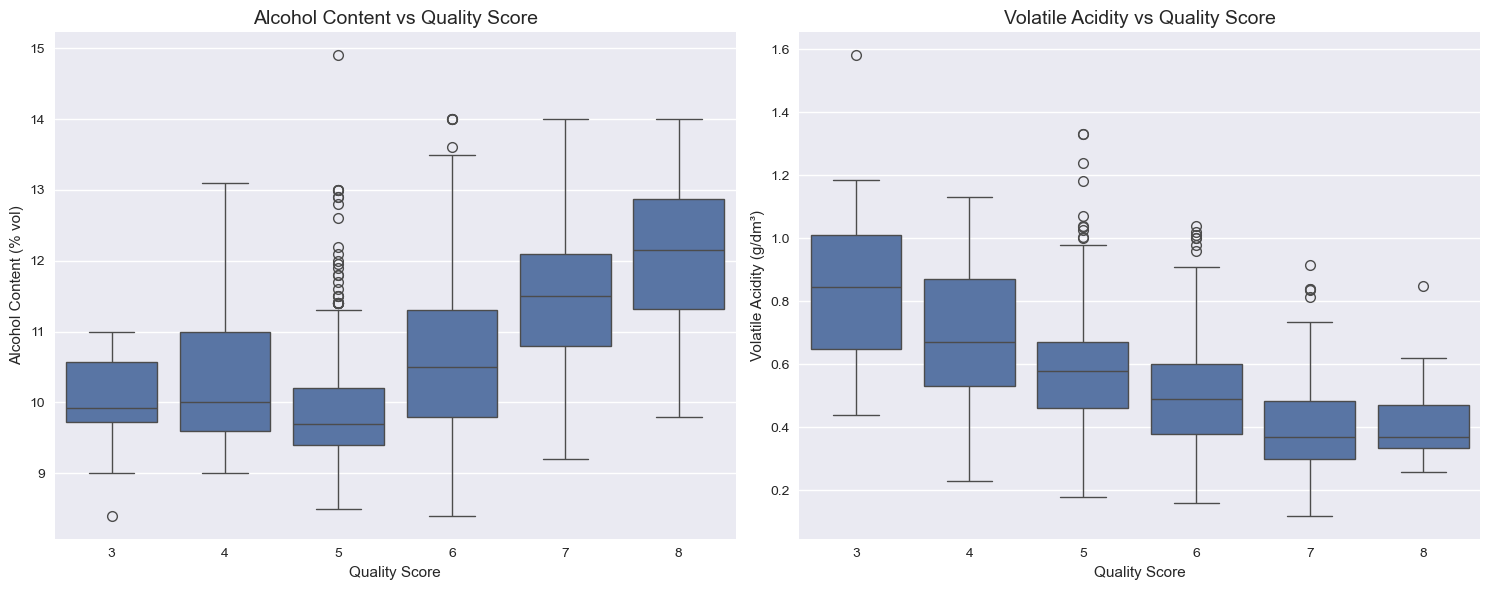

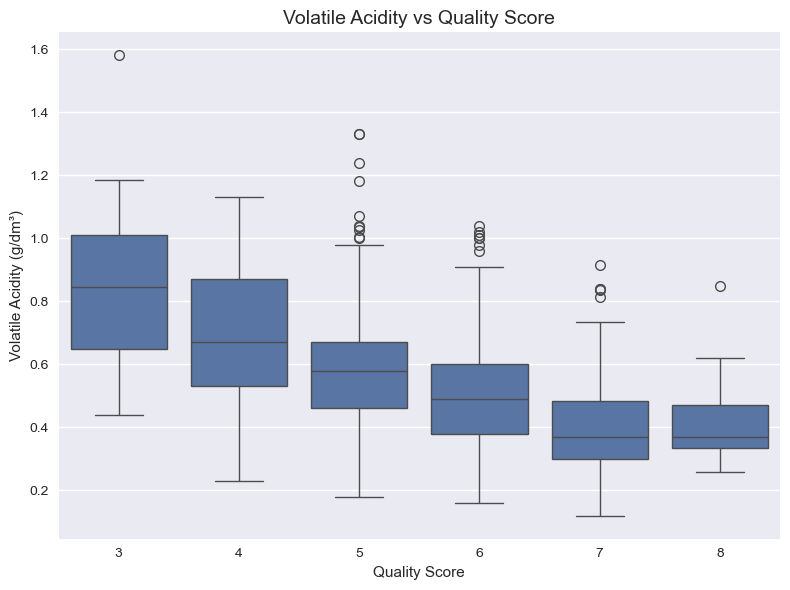

In [22]:
# Plot key feature relationships
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# alcohol vs quality
sns.boxplot(data=df, x='quality', y='alcohol', ax=axes[0])
axes[0].set_title('Alcohol Content vs Quality Score', fontsize=14)
axes[0].set_xlabel('Quality Score')
axes[0].set_ylabel('Alcohol Content (% vol)')

# volatile acidity vs quality
sns.boxplot(data=df, x='quality', y='volatile acidity', ax=axes[1])
axes[1].set_title('Volatile Acidity vs Quality Score', fontsize=14)
axes[1].set_xlabel('Quality Score')
axes[1].set_ylabel('Volatile Acidity (g/dm³)')

plt.tight_layout()
plt.savefig('figures/alcohol_quality_box.png', dpi=300, bbox_inches='tight')
plt.show()

# Save volatile acidity plot separately
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='quality', y='volatile acidity')
plt.title('Volatile Acidity vs Quality Score', fontsize=14)
plt.xlabel('Quality Score')
plt.ylabel('Volatile Acidity (g/dm³)')
plt.tight_layout()
plt.savefig('figures/vol_acid_quality_box.png', dpi=300, bbox_inches='tight')
plt.show()


## 10. Key Findings (EDA Takeaways)


In [ ]:
print("=== EDA Key Findings ===")
print("• Dataset contains 1599 red wine samples with 12 features, no missing values, good data quality")
print("• Alcohol content and volatile acidity are the two most important features correlated with wine quality, suitable as key input variables for predictive modeling")


=== EDA 主要结论 ===
• 数据集包含1599个红酒样本，12个特征变量，无缺失值，数据质量良好
• 酒精含量和挥发性酸度是与红酒质量最相关的两个关键特征，可作为预测模型的重要输入变量


## 11. File Structure Organization


In [23]:
# Check generated file structure
import os

print("=== Generated File Structure ===")
print("\nCurrent directory files:")
for item in os.listdir('.'):
    if os.path.isfile(item):
        print(f"📄 {item}")
    else:
        print(f"📁 {item}/")

print("\ntables/ directory files:")
if os.path.exists('tables'):
    for item in os.listdir('tables'):
        print(f"📄 tables/{item}")

print("\nfigures/ directory files:")
if os.path.exists('figures'):
    for item in os.listdir('figures'):
        print(f"📄 figures/{item}")

print("\n=== EDA Analysis Complete ===")
print("All analysis results have been saved to respective directories and are ready for presentation.")


=== Generated File Structure ===

Current directory files:
📄 .Rhistory
📁 tables/
📄 .DS_Store
📁 figs/
📄 group contract 540024283.docx
📄 winequality-red.csv
📄 winequality.names
📄 EDA_red_wine_presentation.ipynb
📁 figures/
📄 EDA_red_wine.ipynb
📁 .ipynb_checkpoints/

tables/ directory files:
📄 tables/data_dict.csv
📄 tables/summary_stats.csv

figures/ directory files:
📄 figures/vol_acid_quality_box.png
📄 figures/class_balance.png
📄 figures/corr_heatmap_v1.png
📄 figures/alcohol_quality_box.png
📄 figures/hist_grid_v1.png

=== EDA Analysis Complete ===
All analysis results have been saved to respective directories and are ready for presentation.
